In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [70]:
#Loading needed packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

# to make sure all visualizations are plotted inline with the notebook
%matplotlib inline

In [71]:
#setting the width of the columns so i can see all contents

pd.set_option('display.max_colwidth', -1)

## Reading dataframe

In [72]:
#reading the master dataframe
WeRateDogs = pd.read_csv('twitter_archive_master.csv')

In [73]:
WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
favorite_count        1994 non-null float64
retweet_count         1994 non-null float64
dogs_staging          1994 non-null object
tweet_date            1994 non-null object
rating_percent        1994 non-null float64
breed                 1994 non-null object
breed_conf            1994 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 249.3+ KB


In [74]:
#changing the columns to the correct datatype
WeRateDogs['tweet_id'] = WeRateDogs['tweet_id'].astype(str)
WeRateDogs['source'] = WeRateDogs['source'].astype('category')
WeRateDogs['dogs_staging'] = WeRateDogs['dogs_staging'].astype('category')
WeRateDogs['tweet_date'] = pd.to_datetime(WeRateDogs['tweet_date'])
WeRateDogs = WeRateDogs.set_index('tweet_date')

## Analysis:

**1. Retweet Count & Favorite Count** How the two counts are changing over time, is one of them changing faster? are they correlated?

**2. Dog Breed** What breed has the highest prediction? And what is the average rate for the highest predictions?

**3. Dogs Staging** What is the most popular dog stage? What is the highest rate for every dog stage?

**4. Dogs rates** How is dogs rates changed overtime? What is the most frequent rate?


In [75]:
WeRateDogs.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,favorite_count,retweet_count,dogs_staging,rating_percent,breed,breed_conf
tweet_date,,,,,,,,,,,,,,,
2017-08-01,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,38844.0,8607.0,unknown,1.3,Not Sure,0.000000
2017-08-01,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,33275.0,6321.0,unknown,1.3,Chihuahua,0.323581
2017-07-31,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,25072.0,4194.0,unknown,1.2,Chihuahua,0.716012


### 1.Retweet Count & Favorite Count

I'm interested on how the two counts are changing over time, is one of them changing faster? are they correlated?

In [76]:
#I want only the counts and the date columns

df_retweet_count = WeRateDogs.groupby('tweet_date')['retweet_count'].sum()
df_favorite_count = WeRateDogs.groupby('tweet_date')['favorite_count'].sum()

#df_new.set_index('tweet_date', inplace=True)

In [77]:
#making both series to dataframes
df_retweet_count = pd.DataFrame(df_retweet_count)
df_favorite_count = pd.DataFrame(df_favorite_count)

In [78]:
#let's merge the two dataframes, it will be easier to plot
df_count = pd.merge(df_favorite_count, df_retweet_count, left_index=True, right_index=True, how = 'outer')

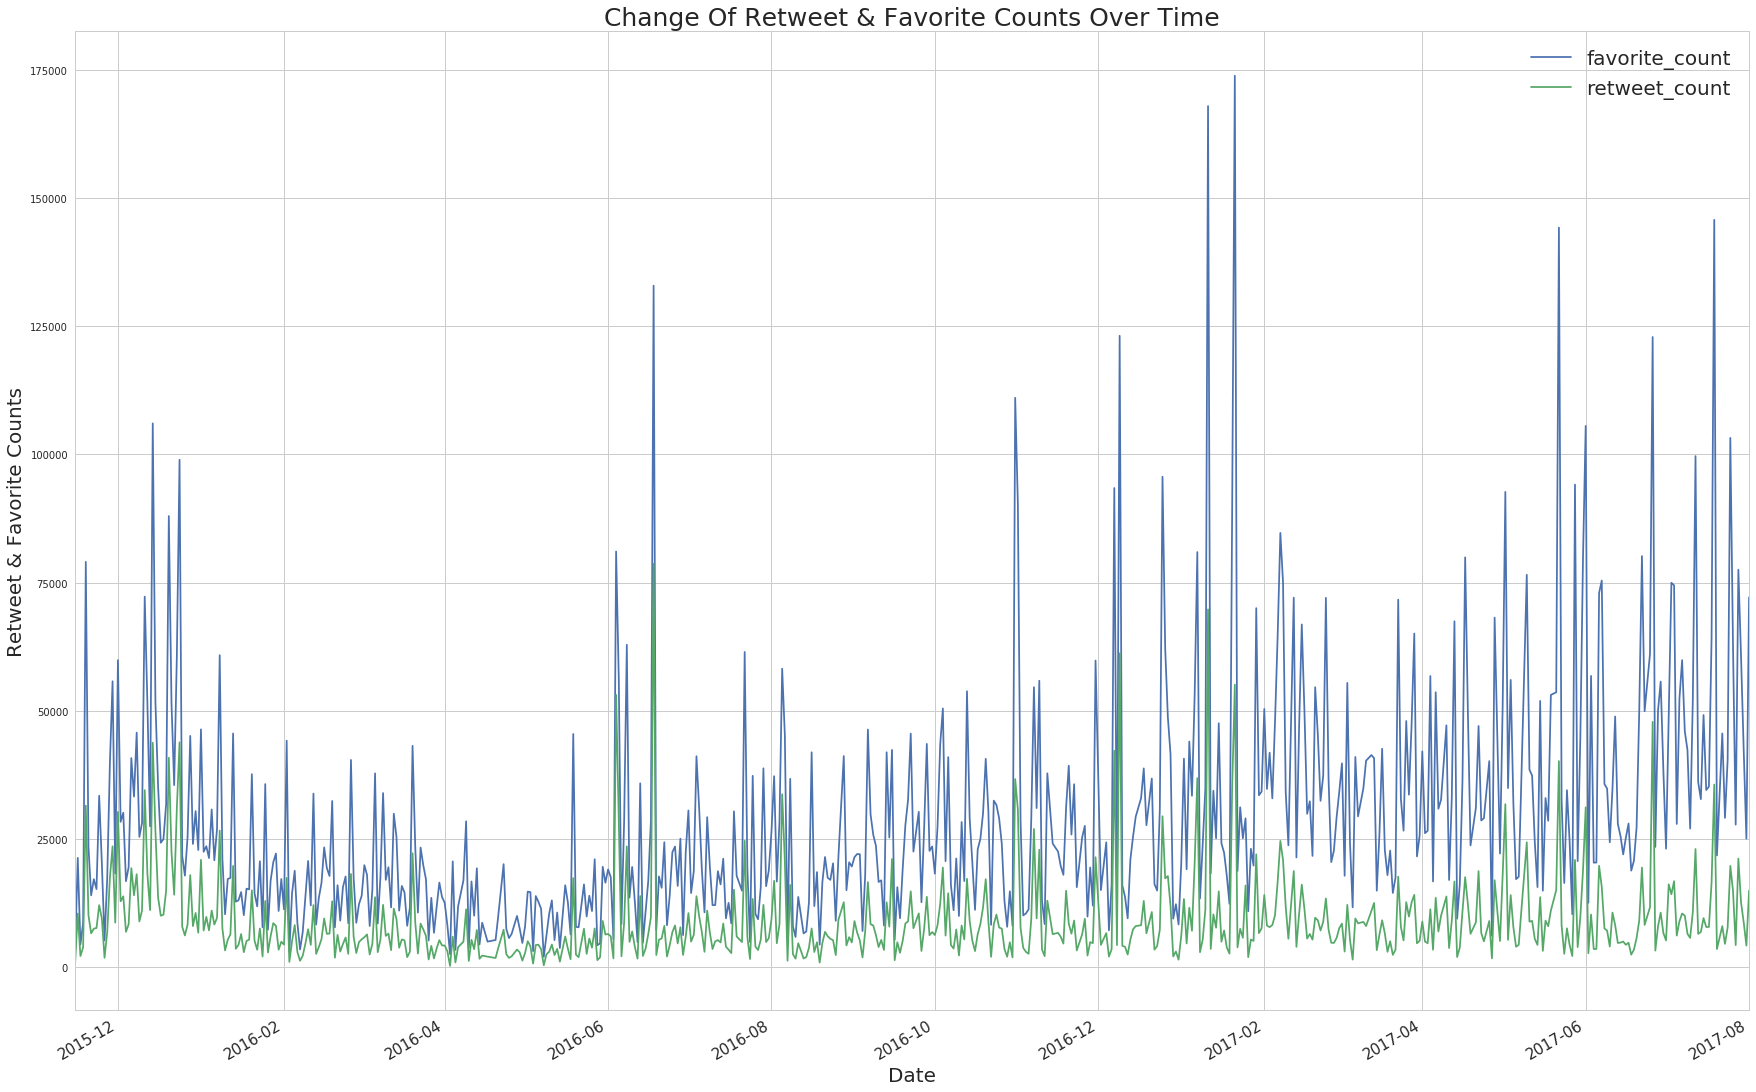

In [89]:
df_count[['favorite_count', 'retweet_count']].plot()
plt.title('Change Of Retweet & Favorite Counts Over Time', fontsize=25)
plt.xticks(size = 15)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Retweet & Favorite Counts', fontsize=20);
plt.rc('figure', figsize=(30,20))
plt.legend(fontsize=20) # legend

##### Results:

There is a small increase especially in the favorite_count, which shows so much more values than the retweet_count. And this makes sense, many users might have nothing to say other than i like this.

Although the change in retweet_count is smaller than the one in favorite_count, it's still correlated with it.

I notice especially higher peaks in both counts in two periods during the year, around end/start of year, and around mid of year. it might be because these two periods are the most active during the year, after holidays and the start of summer

### Dog Breed

I would like to see what breed has the highest predictions, and what is the average rate for the highest predictions

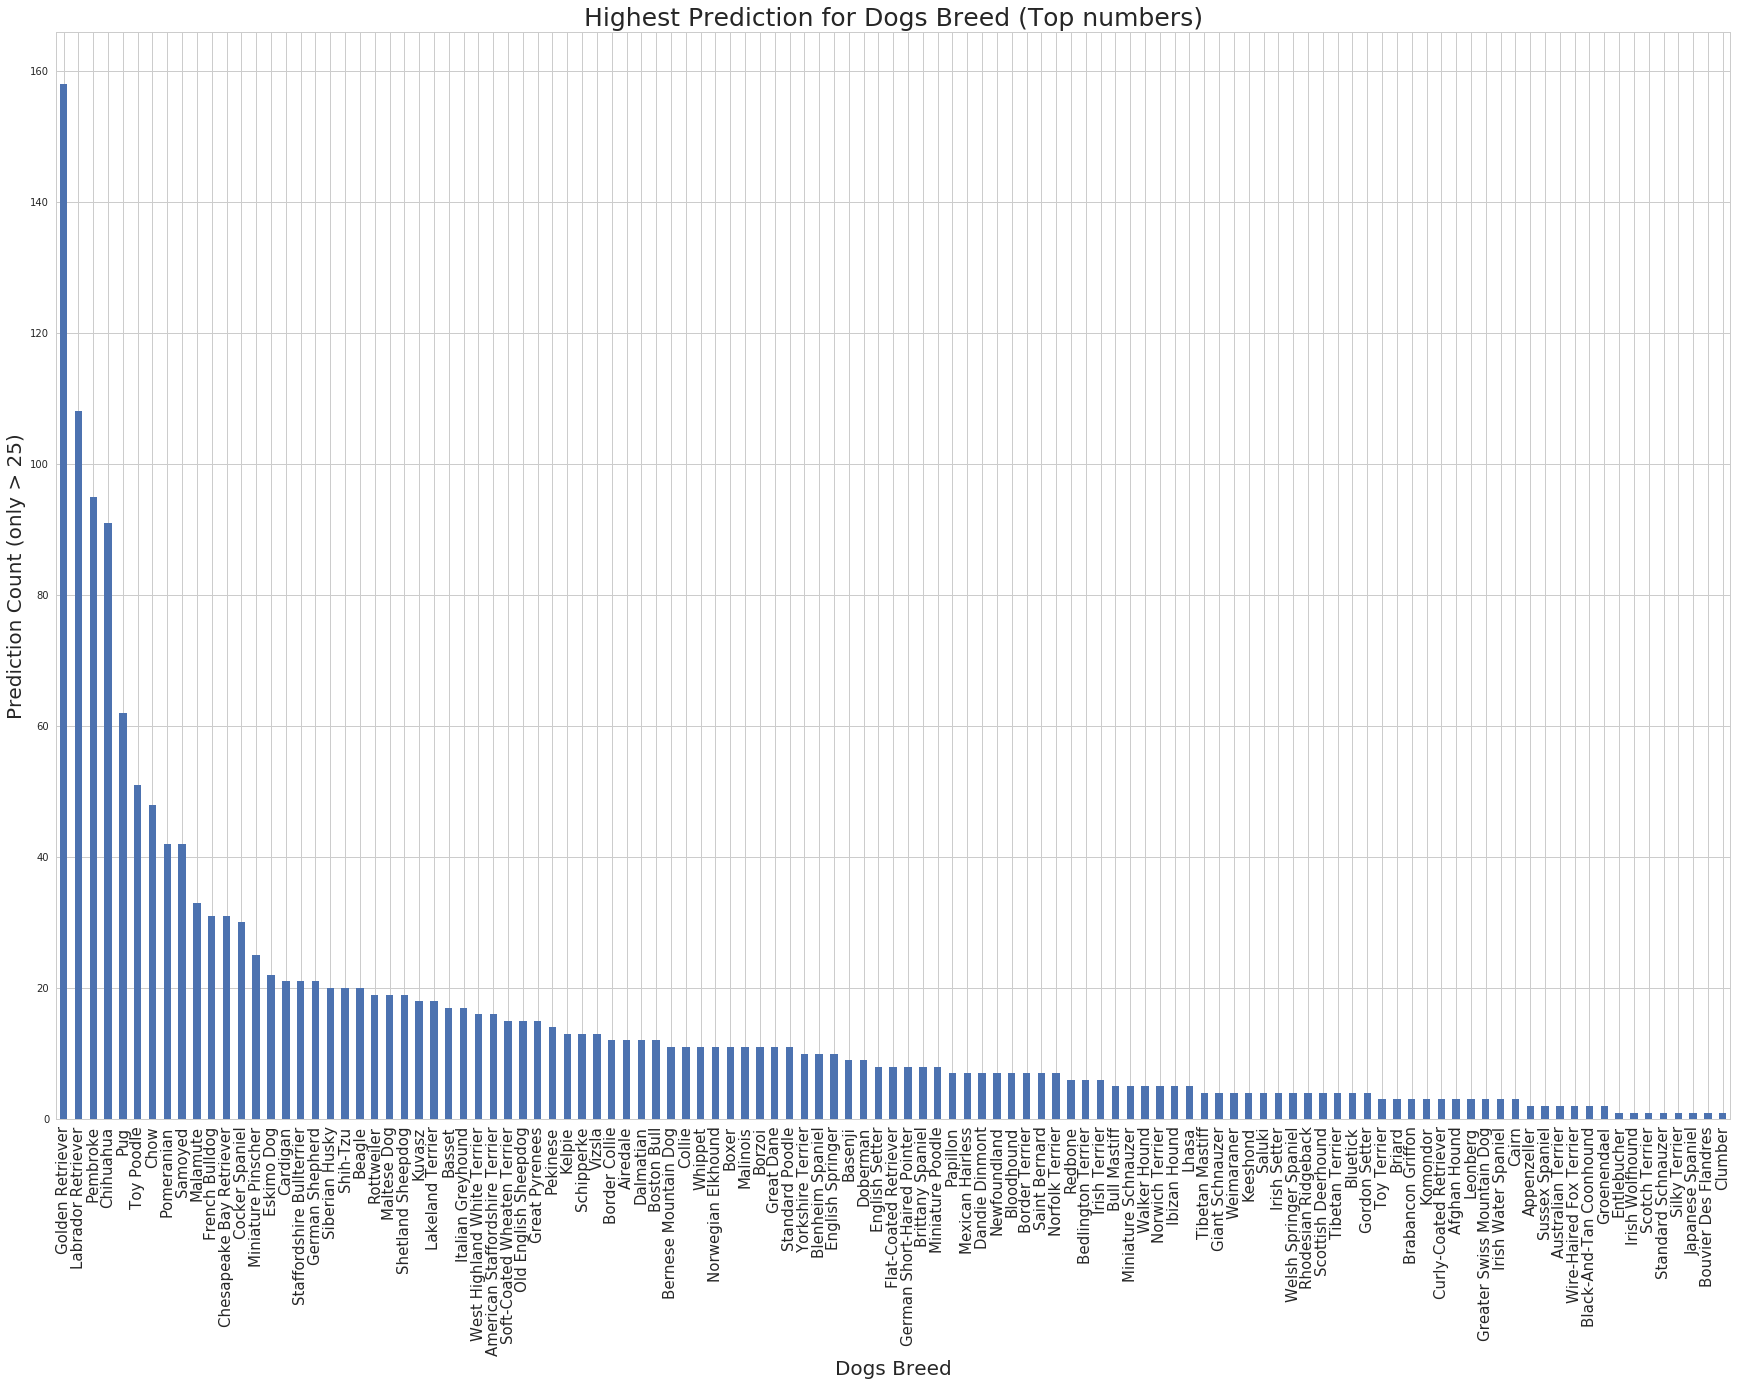

In [80]:
WeRateDogs[WeRateDogs['breed'] != "Not Sure"]['breed'].value_counts().plot(kind = 'bar')
plt.title('Highest Prediction for Dogs Breed (Top numbers)', fontsize=25)
plt.xticks(size = 15)
plt.xlabel('Dogs Breed', fontsize=20)
plt.ylabel('Prediction Count (only > 25)', fontsize=20);
plt.rc('figure', figsize=(30,20))

This is along list, i'll limit to the breeds with the 15 counts and above. This will make my plot more readable.

In [81]:
#excluding rows that has no dog breed and also excluding breeds with less or 15 occurrence. 
breed_counts = WeRateDogs[WeRateDogs['breed'] != "Not Sure"]['breed'].value_counts()[WeRateDogs['breed'].value_counts() > 15]

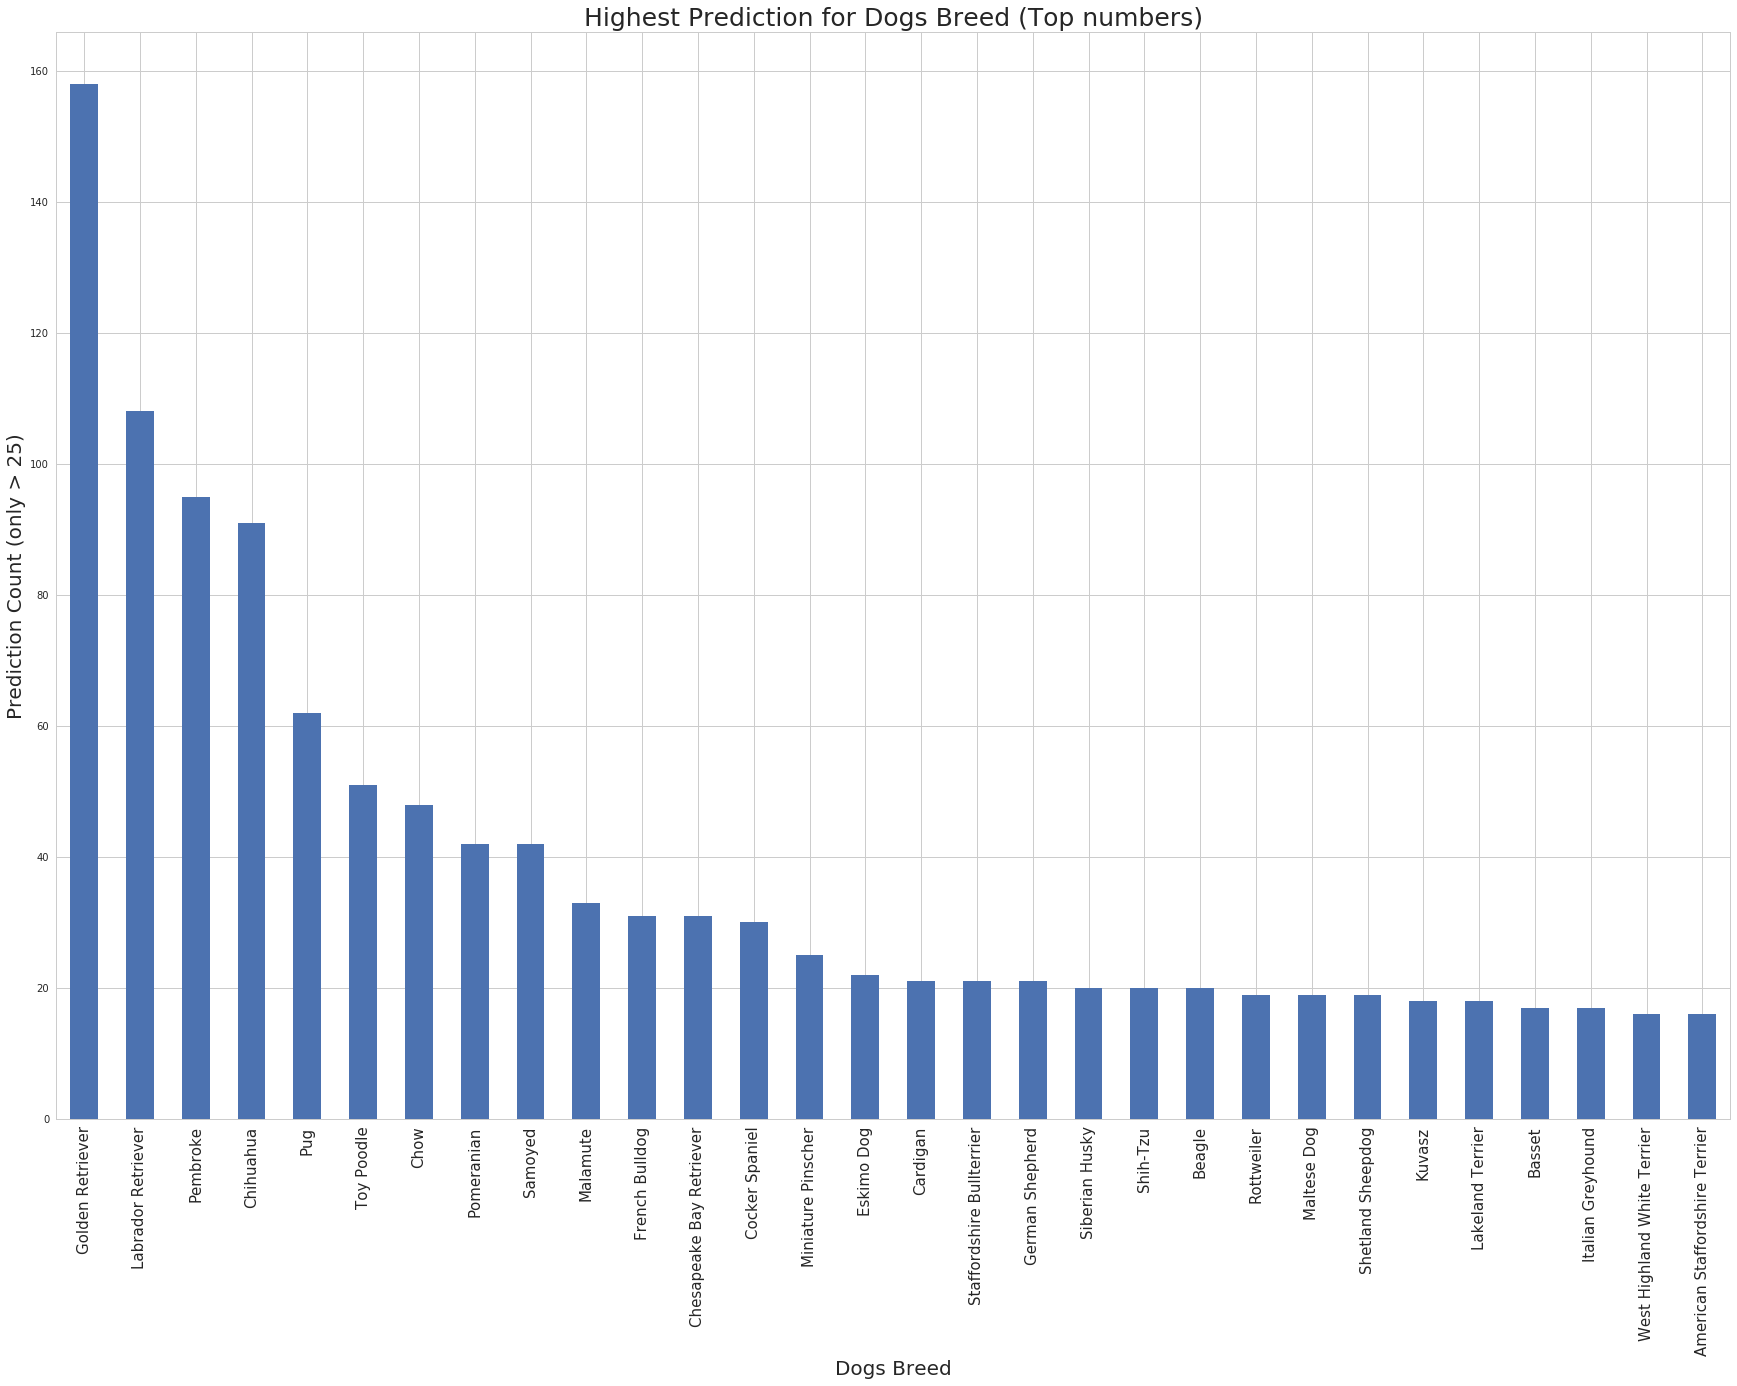

In [82]:
breed_counts.plot(kind = 'bar')
plt.title('Highest Prediction for Dogs Breed (Top numbers)', fontsize=25)
plt.xticks(size = 15)
plt.xlabel('Dogs Breed', fontsize=20)
plt.ylabel('Prediction Count (only > 25)', fontsize=20);
plt.rc('figure', figsize=(30,20))

In [83]:
print(WeRateDogs[WeRateDogs['breed'] == "Golden Retriever"]['rating_numerator'].mean())
print(WeRateDogs[WeRateDogs['breed'] == "Labrador Retriever"]['rating_numerator'].mean())
print(WeRateDogs[WeRateDogs['breed'] == "Pembroke"]['rating_numerator'].mean())
print(WeRateDogs[WeRateDogs['breed'] == "Chihuahua"]['rating_numerator'].mean())

12.9651898734
13.6111111111
11.3684210526
10.4835164835


##### Results:

Labrador Retriever is the second highest with 108 correct prediction and 12.9. Pembroke (95) (average rate of 11.4) and Chihuahua (91) (average rate of 10.5) come next.

But the highest prediction is for the "Golden Retriever" with 158 correct prediction and average rate of 13.6. Which shows that this breed is the most popular breed of dogs here.

### Dogs Staging

What is the most popular dog stage? What is the highest rate for every dog stage?

In [84]:
#dogs_staging distribution
WeRateDogs['dogs_staging'].value_counts()

unknown    1641
pupper     223 
doggo      72  
floofer    29  
puppo      28  
blep       1   
Name: dogs_staging, dtype: int64

In [85]:
#Checking the five numbers for dogs rating percentage by dogs staging
WeRateDogs.groupby('dogs_staging')['rating_percent'].describe()

,count,mean,std,min,25%,50%,75%,max
dogs_staging,,,,,,,,
blep,1.0,1.200000,NaN,1.2,1.2,1.20,1.2,1.2
doggo,72.0,1.163889,0.163849,0.5,1.1,1.20,1.3,1.4
floofer,29.0,0.889655,0.396723,0.2,0.6,1.10,1.2,1.3
pupper,223.0,1.056170,0.185174,0.3,1.0,1.10,1.2,1.4
puppo,28.0,1.214286,0.120844,0.9,1.2,1.25,1.3,1.4
unknown,1641.0,1.181498,4.478873,0.0,1.0,1.10,1.2,177.6


In [86]:
# difference in rating count between doggo and puppo
72 - 28, 223 - 28


(44, 195)

##### Results:

- Obviously, there are many tweets with unknown dogs_staging, unfortunately, we don't have all the values, but based on the available values. pupper is the dominating stage among the others, then deggo, floofer and puppo are very close, we have only one bleb.

- Highest rating percent for puppo 1.4 but an average rate 12.1, doggo is also 1.4, but it's average rate is 11.6. pupper's highest rate is 14/10 and it's average rate is 10.6

So although puppo has 44 less rating counts than doggo, and 195 less than pupper It still has higher rating average than both. I wonder why

### Dogs Rates

How is dogs rates changed overtime? What is the most frequent rate (score)?

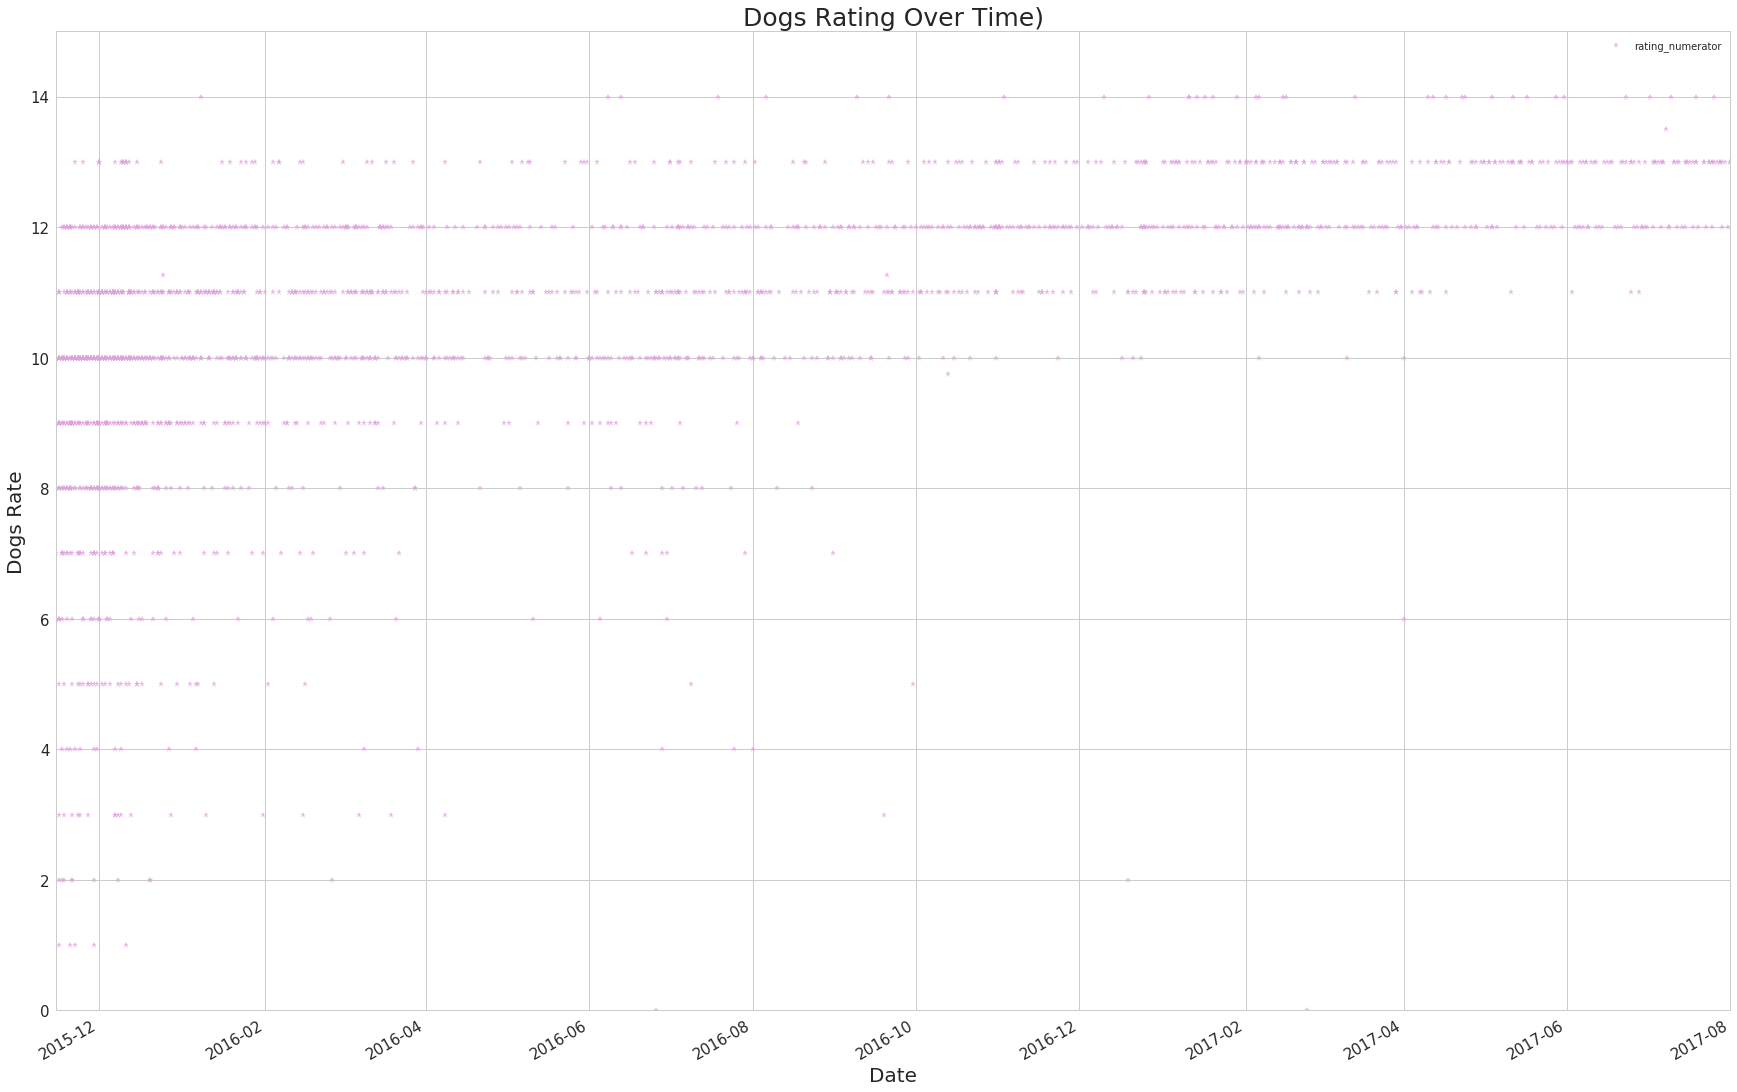

In [87]:
WeRateDogs.plot(y ='rating_numerator', ylim=[0,15], style = '*', color = 'plum', alpha = .7)
plt.title('Dogs Rating Over Time)', fontsize=25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Dogs Rate', fontsize=20);
plt.rc('figure', figsize=(30,20))

[Text(0,0.5,'Dogs rating'),
 Text(0.5,0,'Count'),
 Text(0.5,1,'Counts of Dogs Rating')]

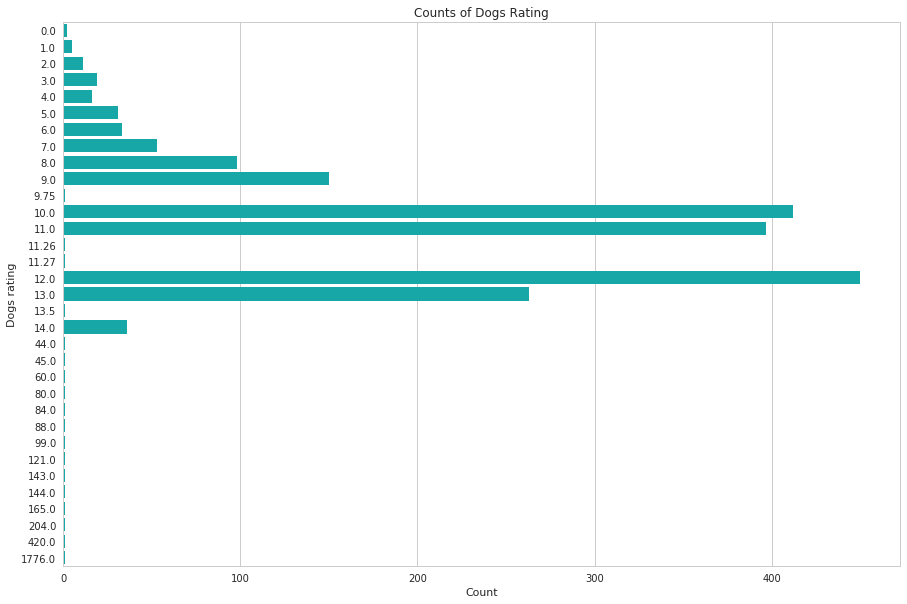

In [88]:
#sns.countplot(y="rating_numerator", hue="dogs_staging", data=WeRateDogs, palette="Greens_d");
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="rating_numerator", data=WeRateDogs, color="c")
ax.set(ylabel="Dogs rating",
       xlabel="Count", title = "Counts of Dogs Rating")

##### Results:

Rates level is increasing overtime, there are certainly more enthusiasm and participation. We can barely see any rates below 10 after 2016-10

12 is the most frequent dog rate (more than 400), 10 comes next, then 11, then 13. Other rates counts are 150 and less. i think this makes sense, with the unusual and unique rating system that many users are enjoying, people still tend to stay close to 10 in their ratings. in my opinion, this is a human mentality.

## Conclusion

**Limitations:**

- The dogs stages were extracted from the text, so it completely depend on the tweet having one of the stages clearly mentioned.

- The Rates were also extracted from the tweet text, and while i was able to extract numbers for all tweets, they are not all accurate, the reason is that many tweets had more than rate for multiple dogs

- Not all tweets had images, so i had to exclude those ones.

- The dogs breed prediction wasn't correct for all tweets, this resulted in some unidentified breeds.

- The unique rating system resulted on many outliers in the rates

**With the limitation in the data i had, and based on my analysis, these are my "TENTATIVE" findings:**

Overall, the data shows an increase in rating scores overtime. We can barely see any rates below 10 after 2016-10. the most frequent rate (score) is 12, then comes 10.

puppo has higher rating average (12.1) among other dog stages. doggo (11.6) and pupper (10.6) come next. However, pupper has the most rating count among all.

The highest correct breed prediction is for the "Golden Retriever" with 158 correct prediction and average rate of 13.6. Which shows that this breed is the most popular breed of dogs here.

Although the increase in favorite_count is more than that of retweet_count, but both counts are strongly correlated.

There are high peaks in both counts in two periods during the year, around end/start of year, and around mid of year. it might be because these two periods are the most active during the year, after holidays and the start of summer